<a href="https://colab.research.google.com/github/suraj-safi1/Time-series-analysis/blob/main/TimesseriesAirPassenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from statsmodels.tsa.seasonal import seasonal_decompose



In [ ]:
#readData
df1=pd.read_csv('/content/AirPassengers.csv')

In [ ]:
#check data types
df1.dtypes

Month          object
#Passengers     int64
dtype: object

In [ ]:
#check top five rows
df1.head

<bound method NDFrame.head of        Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]>

In [ ]:
#we are providing inputs to tell pandas that we are trying to work with time series analysis
df1=pd.read_csv('/content/AirPassengers.csv',parse_dates=['Month'])

In [ ]:
df1.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [ ]:
df1.head

<bound method NDFrame.head of          Month  #Passengers
0   1949-01-01          112
1   1949-02-01          118
2   1949-03-01          132
3   1949-04-01          129
4   1949-05-01          121
..         ...          ...
139 1960-08-01          606
140 1960-09-01          508
141 1960-10-01          461
142 1960-11-01          390
143 1960-12-01          432

[144 rows x 2 columns]>

In [ ]:
#it is recommended that we make our time series reference as the index
df1=pd.read_csv('/content/AirPassengers.csv',parse_dates=['Month'],index_col='Month')

In [ ]:
df1.head

<bound method NDFrame.head of             #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]>

In [ ]:
#we can conveniently dp slicing i.e. obtain data for a specific time period
df1['1951-04-01':'1952-03-01']

,#Passengers
Month,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


In [ ]:
#we can check values coresponding to a specific time point
df1.loc['1960-05-01']

#Passengers    472
Name: 1960-05-01 00:00:00, dtype: int64

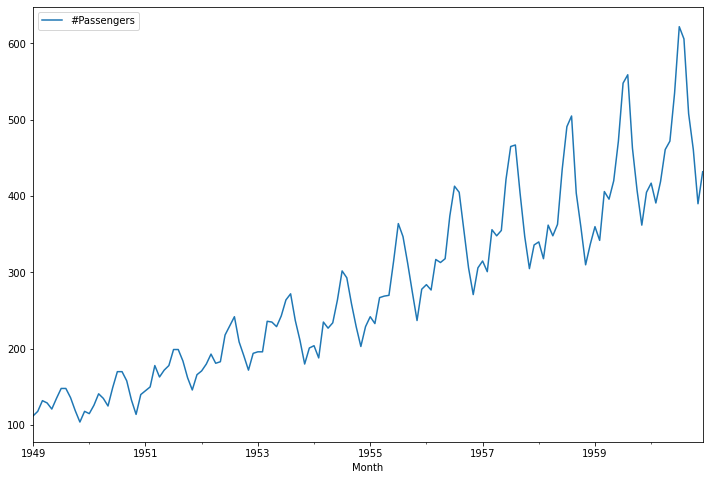

In [ ]:
#plot the time series 
df1.plot()
plt.show()

By the above plot we see-
-- trend present with upward
-- seasonality not constant
** Here now we use Multiplicative model

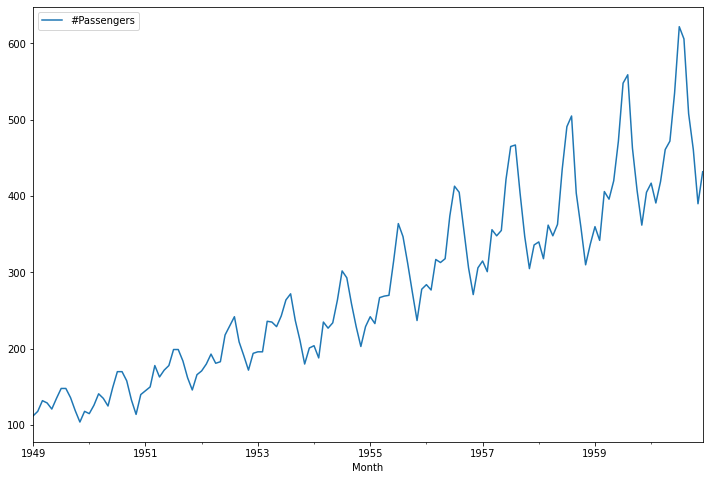

In [ ]:
# increase the figure size
from pylab import rcParams
rcParams['figure.figsize']=12,8
df1.plot()
plt.show()

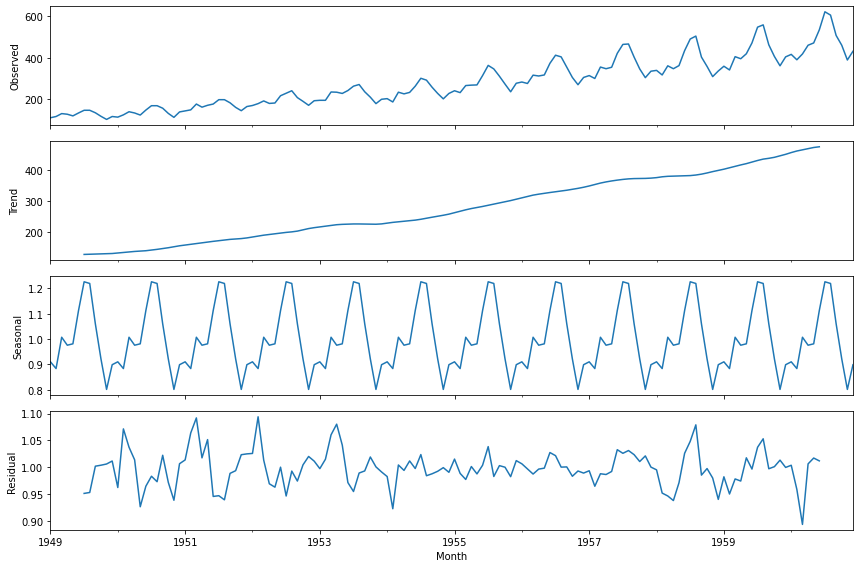

In [ ]:
##Decompose the time series multiplicatively

df1_mul_decompose=seasonal_decompose(df1,model='multiplicative')
df1_mul_decompose.plot()
plt.show()

Now we are converting Multiplicative model into addative model by log the multiplicative value.

In [ ]:
#let's try to do log transformation
df1_log=df1.copy()

In [ ]:
df1_log['pax']=np.log(df1['#Passengers'])

In [ ]:
df1_log.pax

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: pax, Length: 144, dtype: float64

In [ ]:
df1.head

<bound method NDFrame.head of             #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]>

In [ ]:
df1.columns

Index(['#Passengers'], dtype='object')

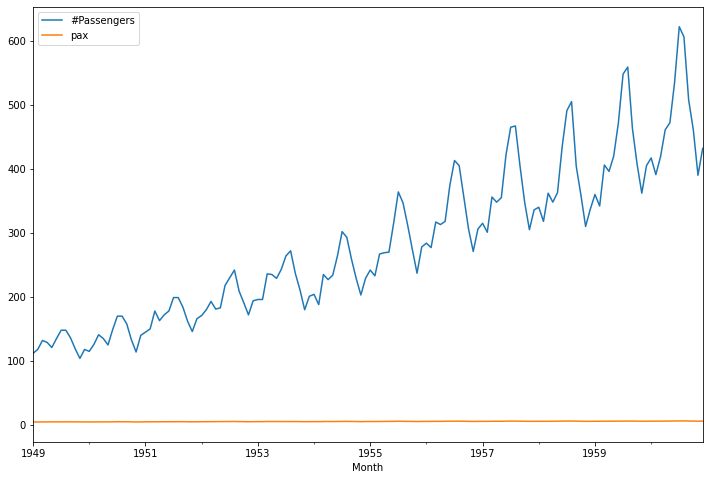

In [ ]:
#visualised the log transformed series
df1_log.plot()
plt.show()

seasonal pattern shows no variation

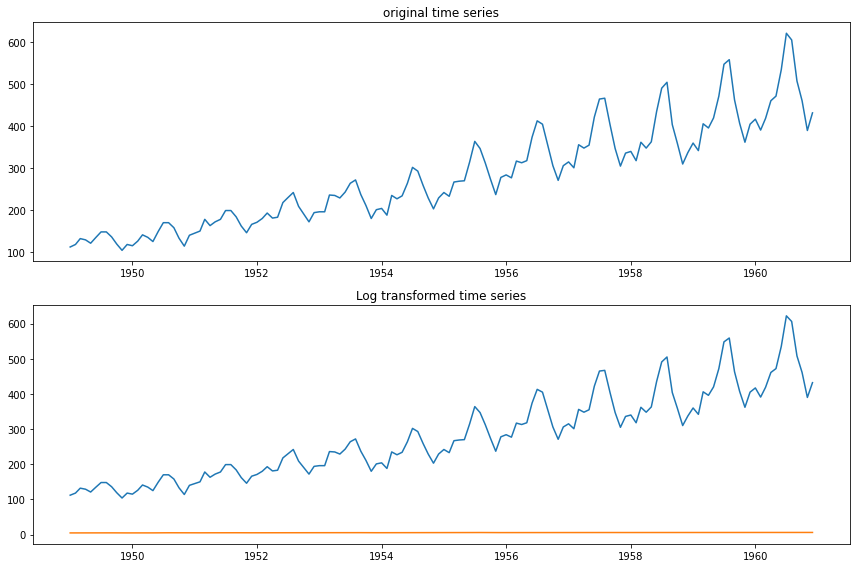

In [ ]:
#compare with the original series
plt.subplot(2,1,1)
plt.title('original time series')
plt.plot(df1)

plt.subplot(2,1,2)
plt.title('Log transformed time series')
plt.plot(df1_log)
plt.tight_layout()